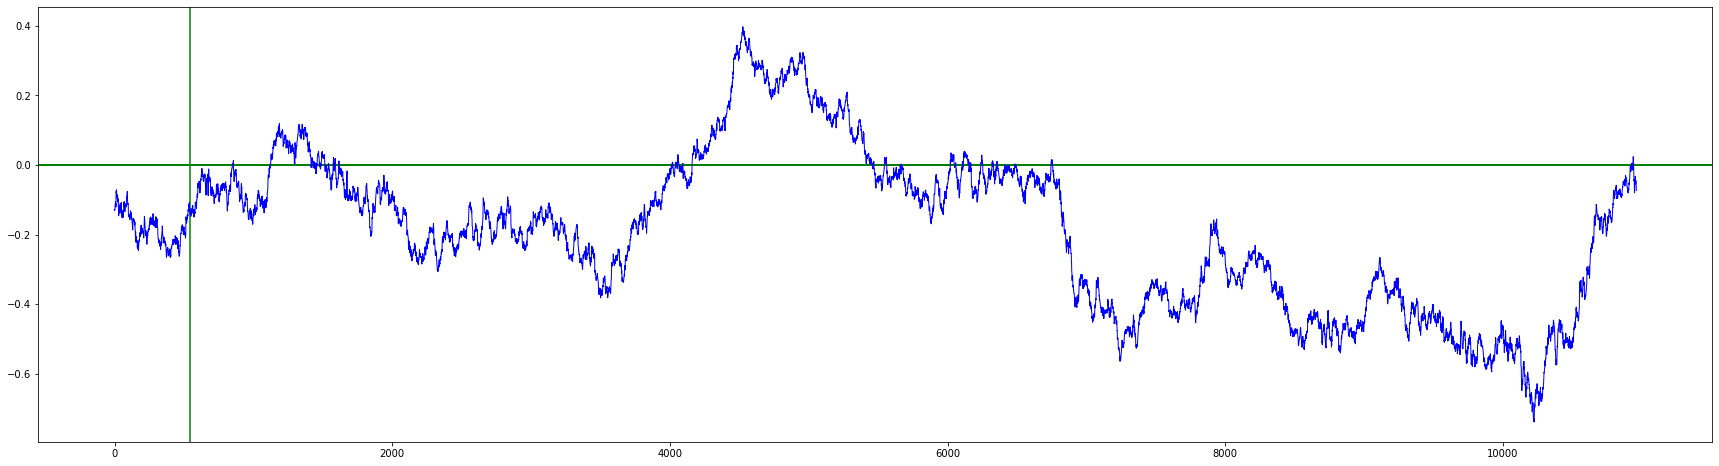

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output
import time


log_interval=4*24
memory_len=1000000

s = 1000
#s = 500
#s = 1

file1 = open("logs/r2_log.txt")
text = file1.read()
file1.close()

ep_wins = [float(x) for x in text.split("\n")[0:] if x != ""]

ep_total = []
cr = 0
for i in ep_wins:
  cr += i
  ep_total.append(cr)


ep_s = ep_wins
x1 = [np.average(ep_s[i-s+1:i+1])for i in tqdm(range(s,len(ep_s)))]
x2 = [v for v in tqdm(ep_wins)]
clear_output()


if True:
    plt.figure(figsize=(30,8))
    plt.axhline(y=0, color = "green", linewidth=2)
    plt.axvline(x=int(len(x1)-memory_len/log_interval),color="g")
    plt.plot(x1, linewidth=1, color = "blue")
else:
    fig, ax = plt.subplots(2,1,figsize = (30,8))
    ax[0].axhline(y=0, color = "green", linewidth=2)
    ax[0].plot(x1, linewidth=1, color = "blue")
    #ax[0].bar([i for i in range(len(ep_s)-s)], x2[s:])
    ax[1].plot(ep_total)


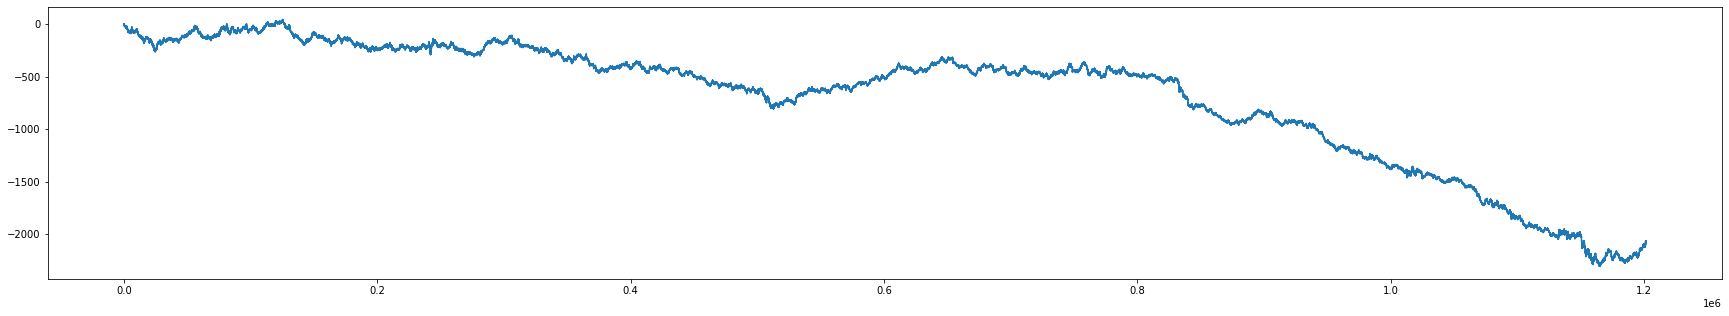

In [2]:

file1 = open("logs/rewards_log.txt")
text = file1.read()
file1.close()

rewards = [float(x) for x in text.split("\n")[0:] if x != ""]


fig, ax = plt.subplots(1,1,figsize=(30,5))
#ax[0].plot(rewards)

s = [0]
for i in rewards:
    z = s[-1]+i
    s.append(z)
ax.plot(s)

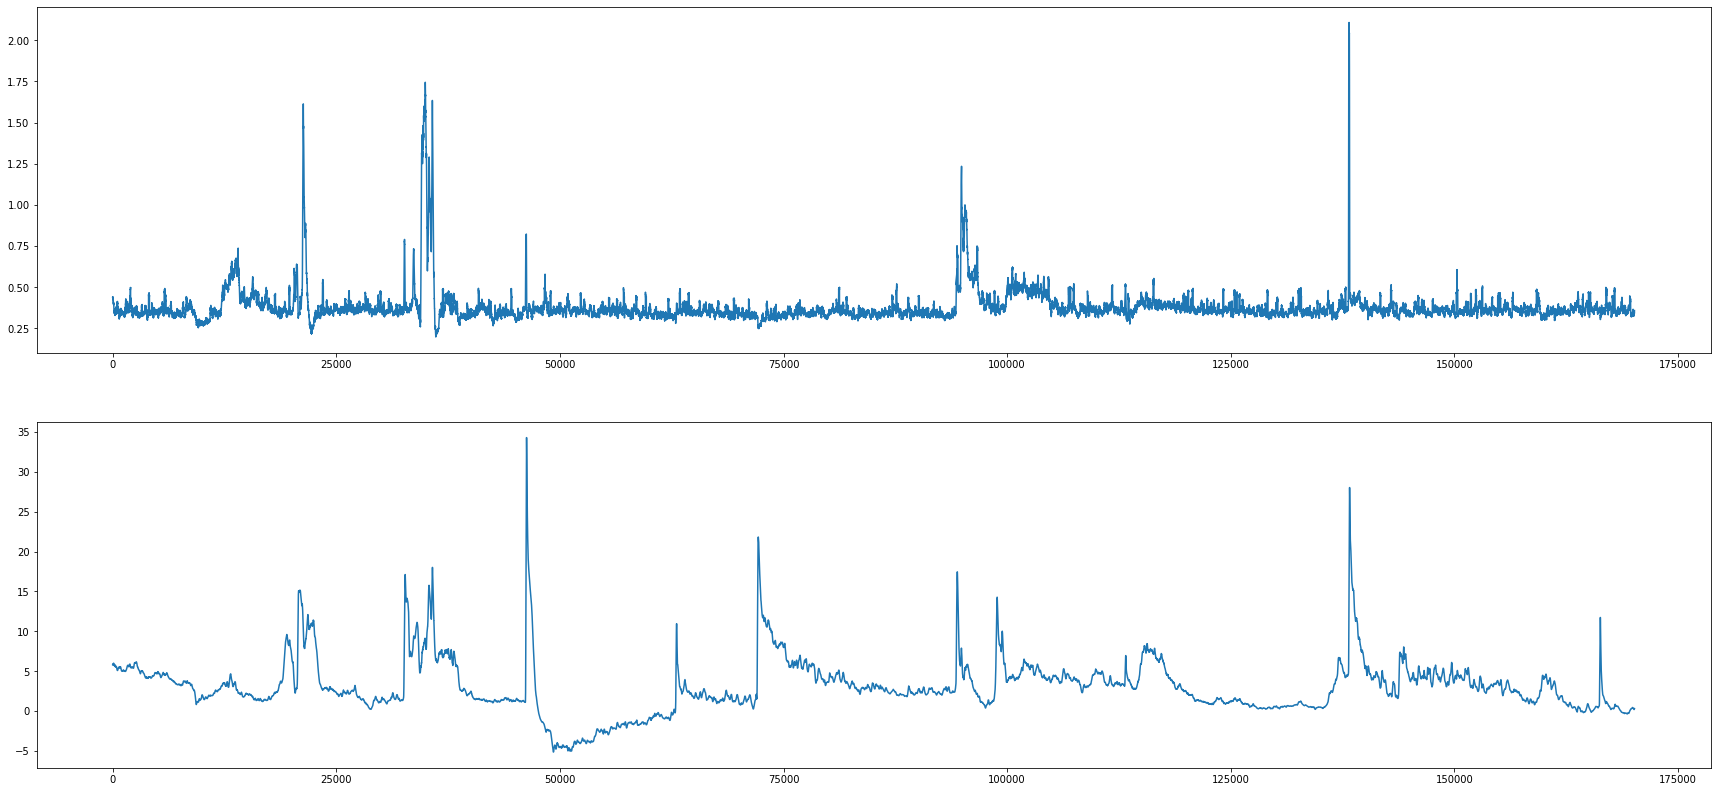

In [3]:

s=100
#s2 = 30000

file1 = open("logs/loss_log.txt")
text = file1.read()
file1.close()

x = [float(x) for x in text.split("\n")[0:] if x != ""]
weights = [m+1 for m in range(s)]
x1=[np.average(x[i-s+1:i+1], weights = None)for i in tqdm(range(s,len(x)))]
#x2=[np.average(x[max(0,i-s2+1):i+1])for i in tqdm(range(s,len(x)))]

file1 = open("logs/qv_log.txt")
text = file1.read()
file1.close()

y = [float(x) for x in text.split("\n")[0:] if x != ""]
weights = [m+1 for m in range(s)]
y1=[np.average(y[i-s+1:i+1], weights = None)for i in tqdm(range(s,len(y)))]

clear_output()
fig, ax = plt.subplots(2,1,figsize=(30,14))
#ax[0].set_ylim(0,1)
ax[0].plot(x1)
#ax[0].plot(x2)
#ax[1].set_ylim(0,5)
ax[1].plot(y1)
